# Question 1

## 1st Order Reaction

In [329]:
import numpy as np

# Constants
E_a = 40 * 4184  # Activation energy in J/mol
R = 8.314  # Gas constant in J/mol*K
T_p = 473.15  # Given temperature in K for the PFR system 

X_A = [0.05, 0.5, 0.999] # Conversions 

for i, XA in enumerate(X_A):
    # Compute rhs
    rhs = - (np.exp(-E_a / (R * T_p)) * XA) / (np.log(1 - XA) * (1 - XA))

    # Ensure rhs is positive before taking log
    if rhs > 0:
        T_c = -E_a / (R * np.log(rhs))
        print(f"At {XA * 100} % Conversion, T_CSTR = {T_c:.2f} K")
    else:
        print("Error: rhs is negative, cannot take logarithm")

At 5.0 % Conversion, T_CSTR = 473.44 K
At 50.0 % Conversion, T_CSTR = 477.26 K
At 99.9 % Conversion, T_CSTR = 535.79 K


## 1.5 Order Reaction

In [317]:
for i, XA in enumerate(X_A):
    # Compute rhs
    smiley_face = 2/(np.exp(-E_a/(R * T_p))) * (1/(np.sqrt(1 - XA)) - 1)
    frowny_face = XA/((1 - XA)**(1.5) * smiley_face)
    T_c = -E_a/(R * np.log(frowny_face))
    print(f"At {XA * 100} % Conversion, T_CSTR = {T_c:.2f} K")

At 5.0 % Conversion, T_CSTR = 473.58 K
At 50.0 % Conversion, T_CSTR = 479.17 K
At 99.9 % Conversion, T_CSTR = 554.56 K


## -1.5 Order Reaction


In [318]:
for i, XA in enumerate(X_A):
    smiley_face = (0.4) * (1 - (1 - XA)**(2.5)) / np.exp(-E_a / (R * T_p))
    frowny_face = (XA * (1 - XA)**(3/2)) / smiley_face
    T_c = -E_a/(R * np.log(frowny_face))
    print(f"At {XA * 100} % Conversion, T_CSTR = {T_c:.2f} K")

At 5.0 % Conversion, T_CSTR = 472.72 K
At 50.0 % Conversion, T_CSTR = 466.33 K
At 99.9 % Conversion, T_CSTR = 387.18 K


# Question 4

## Part A)

In [319]:
kb = 1.3806e-23 # J/K
h = 6.626e-34
pi = np.pi
N_A = 6.022e23

carbon_mass = 12.011 # amu
hydrogen_mass = 1.00784 # amu
oxygen_mass = 15.999 # amu

total_mass = (3 * (carbon_mass + (2 * hydrogen_mass) + oxygen_mass)) / (N_A * 1000) # total mass in kg

def translational_partition(mass, temperature): # mass in kg, h in J*s, kB in J/K
    return ((2 * pi * mass * kb * temperature)/h**2)**(3/2)

print(f"Q_translation at 588 K: {translational_partition(mass = total_mass, temperature = 588):.3e} [1/m^3]")

Q_translation at 588 K: 2.291e+33 [1/m^3]


## Part B)

In [320]:
kb = 1.3806e-23 # J/K
h = 6.626e-34
temperatures = [400, 500, 600, 700] # Kelvin

rcts_inertia = np.array([156.31, 156.31, 282.82]) * 1e-47 # convert 10^-40 g*cm^2 to kg*m^2
rcts_freq = np.array([263, 417, 518, 755, 958, 971, 1048, 1075, 1208, 1230, 1236, 1310, 1381, 1438, 1498, 1518, 2820, 2841, 2998, 3002]) # cm^-1
rcts_freq_degen = np.array([2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1]) # cm^-1

expanded_rcts_freq = np.repeat(rcts_freq, rcts_freq_degen)

tstate_inertia = np.array([192.10, 192.10, 351.58]) * 1e-47 # convert 10^-40 g*cm^2 to kg*m^2
tstate_freq = np.array([134, 248, 273, 434, 528, 893, 914, 1108, 1214, 1222, 1248, 1379, 1415, 1561, 1597, 2879, 2884, 3001, 3004]) # cm^-1
tstate_freq_degen = np.array([2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1]) # cm^-1

expanded_tstate_freq = np.repeat(tstate_freq, tstate_freq_degen)

def rot_partition(sigma, temperature, moments_of_inertia: np.ndarray):
    thetas = h**2 / (8 * pi**2 * moments_of_inertia * kb)
    return (np.sqrt(pi) / sigma) * (temperature**(3/2) / np.sqrt(np.prod(thetas)))

def vib_partition(nus, temperature):
    c = 2.998e10 # speed of light in units of cm/s
    freqs = nus * c # convert frequency from inverse cm to 1/s
    term = 1/(1 - np.exp(-(h * freqs)/(kb * temperature))) # calculate argument of the product 
    return np.prod(term) # raise the term in the product to the power of the degeneracies 

Q_tstate = []

print("Transition State Partition Functions at Varying Temperature:")
print("----------------------------------------------------")
for i, temp in enumerate(temperatures):
    print(f"Translational partition function at {temp} K: {translational_partition(mass = total_mass, temperature = temp):.3e} [1/m^3]")
    print(f"Rotational partition function at {temp} K: {rot_partition(sigma = 3, temperature = temp, moments_of_inertia = tstate_inertia):.3e} [1/m^3]")
    print(f"Vibrational partition function at {temp} K: {vib_partition(nus = expanded_tstate_freq, temperature = temp):.3f}\n")
    Q_tstate.append(translational_partition(mass = total_mass, temperature = temp) * rot_partition(sigma = 3, temperature = temp, moments_of_inertia = tstate_inertia) * vib_partition(nus = expanded_tstate_freq, temperature = temp))

Transition State Partition Functions at Varying Temperature:
----------------------------------------------------
Translational partition function at 400 K: 1.285e+33 [1/m^3]
Rotational partition function at 400 K: 6.661e+04 [1/m^3]
Vibrational partition function at 400 K: 74.110

Translational partition function at 500 K: 1.796e+33 [1/m^3]
Rotational partition function at 500 K: 9.309e+04 [1/m^3]
Vibrational partition function at 500 K: 287.749

Translational partition function at 600 K: 2.361e+33 [1/m^3]
Rotational partition function at 600 K: 1.224e+05 [1/m^3]
Vibrational partition function at 600 K: 1103.912

Translational partition function at 700 K: 2.976e+33 [1/m^3]
Rotational partition function at 700 K: 1.542e+05 [1/m^3]
Vibrational partition function at 700 K: 4150.083



In [321]:
Q_rcts = []

print("Reactant Partition Functions at Varying Temperature:")
print("----------------------------------------------------")
for i, temp in enumerate(temperatures):
    print(f"Translational partition function at {temp} K: {translational_partition(mass = total_mass, temperature = temp):.3e} [1/m^3]")
    print(f"Rotational partition function at {temp} K: {rot_partition(sigma = 3, temperature = temp, moments_of_inertia = rcts_inertia):.3e} [1/m^3]")
    print(f"Vibrational partition function at {temp} K: {vib_partition(nus = expanded_rcts_freq, temperature = temp):.3f}\n")
    Q_rcts.append(translational_partition(mass = total_mass, temperature = temp) * rot_partition(sigma = 3, temperature = temp, moments_of_inertia = rcts_inertia) * vib_partition(nus = expanded_rcts_freq, temperature = temp))

Reactant Partition Functions at Varying Temperature:
----------------------------------------------------
Translational partition function at 400 K: 1.285e+33 [1/m^3]
Rotational partition function at 400 K: 4.861e+04 [1/m^3]
Vibrational partition function at 400 K: 6.701

Translational partition function at 500 K: 1.796e+33 [1/m^3]
Rotational partition function at 500 K: 6.793e+04 [1/m^3]
Vibrational partition function at 500 K: 17.353

Translational partition function at 600 K: 2.361e+33 [1/m^3]
Rotational partition function at 600 K: 8.930e+04 [1/m^3]
Vibrational partition function at 600 K: 49.088

Translational partition function at 700 K: 2.976e+33 [1/m^3]
Rotational partition function at 700 K: 1.125e+05 [1/m^3]
Vibrational partition function at 700 K: 146.439



For this rxn, $q_{trans}$ cancels and the ratio of $q_{rot}$ only leaves $I_{i}$ of the transition state and reactant. Consequently, we only need to find $q_{vib}$

In [331]:
E_a = (-56.05 - (-104.28)) * 4.184 # convert kcal/mol to kj/mol

print(f"Ea: {E_a:.2f} kJ/mol")

rate_constants = []

for i, temp in enumerate(temperatures):
    k = ((kb*temp/h) * np.sqrt(np.prod(tstate_inertia)/np.prod(rcts_inertia)) * 
         (vib_partition(nus = expanded_tstate_freq, temperature = temp)/vib_partition(nus = expanded_rcts_freq, temperature = temp)) * np.exp(-E_a/(R/1000*temp)))
    print(f"Forward Rate Constant, k at {temp} K: {k:.2e}")
    rate_constants.append(k)

Ea: 201.79 kJ/mol
Forward Rate Constant, k at 400 K: 5.61e-13
Forward Rate Constant, k at 500 K: 1.96e-07
Forward Rate Constant, k at 600 K: 1.04e-03
Forward Rate Constant, k at 700 K: 4.95e-01


## Part C

E_a: 213.38 kJ/mol
Intercept: 35.92616503399779
15.602463556856225
4.003718703401463


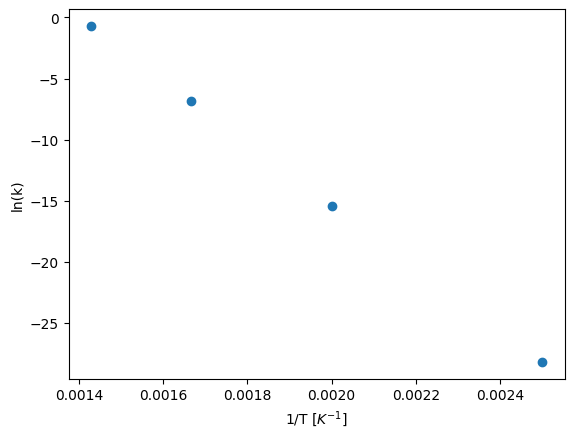

In [323]:
import matplotlib.pyplot as plt

coefficients = np.polyfit(1/np.array(temperatures), np.log(rate_constants), 1)
slope, intercept = coefficients

Ea_Q4 = slope * -R/1000

# Print the results
print(f"E_a: {Ea_Q4:.2f} kJ/mol")
print(f"Intercept: {intercept}")

print(np.log10(np.exp(35.926)))

print(10**(np.log10(np.exp(35.926))-15))

plt.scatter(1/np.array(temperatures), np.log(rate_constants))
plt.xlabel(r"1/T $\left[K^{-1}\right]$")
plt.ylabel(r"ln(k)")
plt.show();

## Part d)

In [324]:
for k, temp in zip(rate_constants, temperatures):
    print(f"A({temp} K) = {k/np.exp(-Ea_Q4/(R/1000 * temp)):.3e}")

A(400 K) = 4.112e+15
A(500 K) = 3.840e+15
A(600 K) = 3.928e+15
A(700 K) = 4.145e+15


# Question 5

## Part b)

In [325]:
m_H2 = 2.02/(N_A*1000) # kg
m_F = 19/(N_A*1000) # kg 
m_tstate = m_H2 + m_F # kg

print(m_H2)

q_trans_H2 = translational_partition(mass = m_H2, temperature = 300)
q_trans_F = translational_partition(mass = m_F, temperature = 300)
q_trans_tstate = translational_partition(mass = m_tstate, temperature = 300)

Q_trans = (q_trans_tstate)/(q_trans_F*q_trans_H2)

print(f"q_trans of H2: {q_trans_H2:.2e}")
print(f"q_trans of F: {q_trans_F:.2e}")
print(f"q_trans of tstate: {q_trans_tstate:.2e}")
print(f"Q_trans: {Q_trans:.2e}")

3.3543673198273e-27
q_trans of H2: 2.80e+30
q_trans of F: 8.09e+31
q_trans of tstate: 9.41e+31
Q_trans: 4.15e-31


## Part c)

In [326]:
I_H2 = 0.275 * (1.66054e-27) * (10**(-10))**2 # amu*angstrom^2 --> kg*m^2
I_tstate = 7.091 * (1.66054e-27) * (10**(-10))**2 # amu*angstrom^2 --> kg*m^2

q_rot_H2 = (8 * pi**2 * kb * 300 * I_H2)/(2*h**2)
q_rot_tstate = (8 * pi**2 * kb * 300 * I_tstate)/(1*h**2)

Q_rot = q_rot_tstate/q_rot_H2

print(f"q_rot of H2: {q_rot_H2:.3f}")
print(f"q_rot of tstate: {q_rot_tstate:.3f}")
print(f"Q_rot: {Q_rot:.3f}")

q_rot of H2: 1.701
q_rot of tstate: 87.707
Q_rot: 51.571


## Part d)

In [327]:
A = Q_rot * Q_trans * (kb*300)/h
print(f"{A:.2e} [m^3/s*molec]")
print(f"{A * (1/(1e-30)):.2e} [m^3/s*molec]")

1.34e-16 [m^3/s*molec]
1.34e+14 [m^3/s*molec]


## Part e)

In [328]:
print(f"{A/300:.2e} [m^3/s*molec]")

4.46e-19 [m^3/s*molec]
